**<font face="Spectral" size=8 color='Lightseagreen'> Hulab sleep data analysis tutorial </font>**

**<font face="Spectral" size=4 color='black'> This script demonstrate how to handle sleep eeg data, including sleep staging, spindle detection, SO detection, PAC, and coupling. Contributed by Tao Xia @ Hulab HKU, Nov, 2021 </font>**

**<font face="Spectral" size=4 color='black'> Feel free to add more content to make it more helpful to junior students, If you have any question please contact:psyxiatao@gmail.com </font>**

**<font face="Spectral" size=4 color='red'> Note:Please do not share it to anyone without permission </font>**

In [363]:
%matplotlib inline
import mne
import os
import mne_bids
from mne_bids import write_raw_bids, BIDSPath,make_dataset_description,read_raw_bids
from mne.preprocessing import ICA, create_eog_epochs
import sys
import event_test
print('Python v{}'.format(sys.version))
print('MNE v{}'.format(mne.__version__))
print('MNE_BIDS v{}'.format(mne_bids.__version__))

Python v3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
MNE v0.23.0
MNE_BIDS v0.8


**<font face="Spectral" size=5 color='tomato'> 1.Read raw data, set montage and transform it to BIDS format </font>**
#### For BIDS introduction, please refer to: https://bids.neuroimaging.io/
#### For MNE-BIDS introduction, please refer to: https://mne.tools/mne-bids/stable/index.html

In [225]:
raw_fname=('Ex_session3_sleep_localizer_104_Cao Xiaolei_2021-09-25_16-53-15.vhdr')#define raw data path
raw=mne.io.read_raw_brainvision(raw_fname,preload=False,eog=['EOG'])#read eeg data with brainvishion format
montage=mne.channels.make_standard_montage('standard_1020')#read channel location
raw.set_montage(montage)#set channel location

Extracting parameters from Ex_session3_sleep_localizer_104_Cao Xiaolei_2021-09-25_16-53-15.vhdr...
Setting channel info structure...


<ipython-input-225-938fd5fafd5b>:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_brainvision(raw_fname,preload=False,eog=['EOG'])#read eeg data with brainvishion format


<RawBrainVision | Ex_session3_sleep_localizer_104_Cao Xiaolei_2021-09-25_16-53-15.eeg, 64 x 409114 (818.2 s), ~94 kB, data not loaded>

In [226]:
bids_path = BIDSPath(subject='104', task='localizer', root='mne_bids//',session='session3',datatype='eeg') #make bids-path    
write_raw_bids(raw, bids_path,overwrite=True)#write raw data in bids path structure

Extracting parameters from C:\Users\Psychology\Desktop\workshop_MNE\Ex_session3_sleep_localizer_104_Cao Xiaolei_2021-09-25_16-53-15.vhdr...
Setting channel info structure...

Writing 'mne_bids\participants.tsv'...

participant_id	age	sex	hand
sub-01	n/a	n/a	n/a
sub-05	n/a	n/a	n/a
sub-104	n/a	n/a	n/a
sub-201	n/a	n/a	n/a

Writing 'mne_bids\participants.json'...

{
    "participant_id": {
        "Description": "Unique participant identifier"
    },
    "age": {
        "Description": "Age of the participant at time of testing",
        "Units": "years"
    },
    "sex": {
        "Description": "Biological sex of the participant",
        "Levels": {
            "F": "female",
            "M": "male"
        }
    },
    "hand": {
        "Description": "Handedness of the participant",
        "Levels": {
            "R": "right",
            "L": "left",
            "A": "ambidextrous"
        }
    }
}
Writing electrodes file to...  mne_bids/sub-104/ses-session3/eeg/sub-104_ses-session

<ipython-input-226-a241c978bd59>:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  write_raw_bids(raw, bids_path,overwrite=True)#write raw data in bids path structure


BIDSPath(
root: mne_bids
datatype: eeg
basename: sub-104_ses-session3_task-localizer_eeg.vhdr)

**<font face="Spectral" size=5 color='black'> Read raw data from BIDS file </font>**

In [227]:
bids_path = BIDSPath(subject='104', task='localizer', root='mne_bids//',session='session3',datatype='eeg')
raw=read_raw_bids(bids_path=bids_path)
raw.load_data()
montage=mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

Extracting parameters from mne_bids\sub-104\ses-session3\eeg\sub-104_ses-session3_task-localizer_eeg.vhdr...
Setting channel info structure...
Reading events from mne_bids\sub-104\ses-session3\eeg\sub-104_ses-session3_task-localizer_events.tsv.
Reading channel info from mne_bids\sub-104\ses-session3\eeg\sub-104_ses-session3_task-localizer_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from mne_bids\sub-104\ses-session3\eeg\sub-104_ses-session3_electrodes.tsv.
The read in electrodes file is: 
 [('name', ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'O2', 'EOG', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Oz']), ('x', ['-0.028230102272475462',

<ipython-input-227-4af4b5722157>:2: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=read_raw_bids(bids_path=bids_path)
<ipython-input-227-4af4b5722157>:2: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['EOG']
  raw=read_raw_bids(bids_path=bids_path)


<RawBrainVision | sub-104_ses-session3_task-localizer_eeg.eeg, 64 x 409114 (818.2 s), ~199.9 MB, data loaded>

In [235]:
fig1=raw.plot_psd(fmax=100,fmin=0.5)#limit the frequency band that we interested

Effective window size : 8.192 (s)


**<font face="Spectral" size=6 color='tomato'> 3.Preprocessing steps prepared by Ziqing Yao and Tao Xia @HKU 2021 </font>**



**<font face="Spectral" size=4 color='black'> (1) Down-sampling (optional, e.g., 250 HZ) </font>**

**<font face="Spectral" size=4 color='black'> (2) Notch filter (50Hz in HK) </font>**

**<font face="Spectral" size=4 color='black'> (3) Filter for ERP/ERSP (high pass, low pass range selection )[0.1,30] </font>**

**<font face="Spectral" size=4 color='black'> (4) Bad channel detect and interpolation </font>**

**<font face="Spectral" size=4 color='black'> (5) Re-reference[common average] </font>**

**<font face="Spectral" size=4 color='black'> (6) Find you events and epoch data(visual inspect the epoch data to remove bad epoch) </font>**

**<font face="Spectral" size=4 color='black'> (7) Run ICA on epoch data(fastica deault, you can also use informax or picard) </font>**

**<font face="Spectral" size=4 color='black'> (8) Remove eye movement related components.[depends on experience, only removing the obvious eye movement component ] </font>**

**<font face="Spectral" size=4 color='black'> (9) Baseline correction </font>**

**<font face="Spectral" size=4 color='black'> For detail interpretation of each preprocessing step, please refer to:https://docs.google.com/presentation/d/1mpvvOolwRaNEOPz2MG4gcNvkms66Cx7g/edit?usp=sharing&ouid=114514243557013806674&rtpof=true&sd=true or https://sccn.ucsd.edu/wiki/Makoto%27s_preprocessing_pipeline </font>**

**<font face="Spectral" size=4 color='red'> Note:record any manual rejected epoch/data points etc for reproduce the same outcome </font>**

**<font face="Spectral" size=5 color='black'> (1-3)Downsampling and filtering </font>**

In [230]:
raw.resample(sfreq=250,npad='auto')
raw.notch_filter(np.arange(50,150,50))
raw.filter(l_freq=0.1,h_freq=30,fir_design='firwin')#high pass filter with fir filter

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8251 samples (33.004 sec)



<RawBrainVision | sub-104_ses-session3_task-localizer_eeg.eeg, 64 x 204557 (818.2 s), ~100.0 MB, data loaded>

**<font face="Spectral" size=5 color='black'> (4)Raw data visualization and bad channel interpolation </font>**

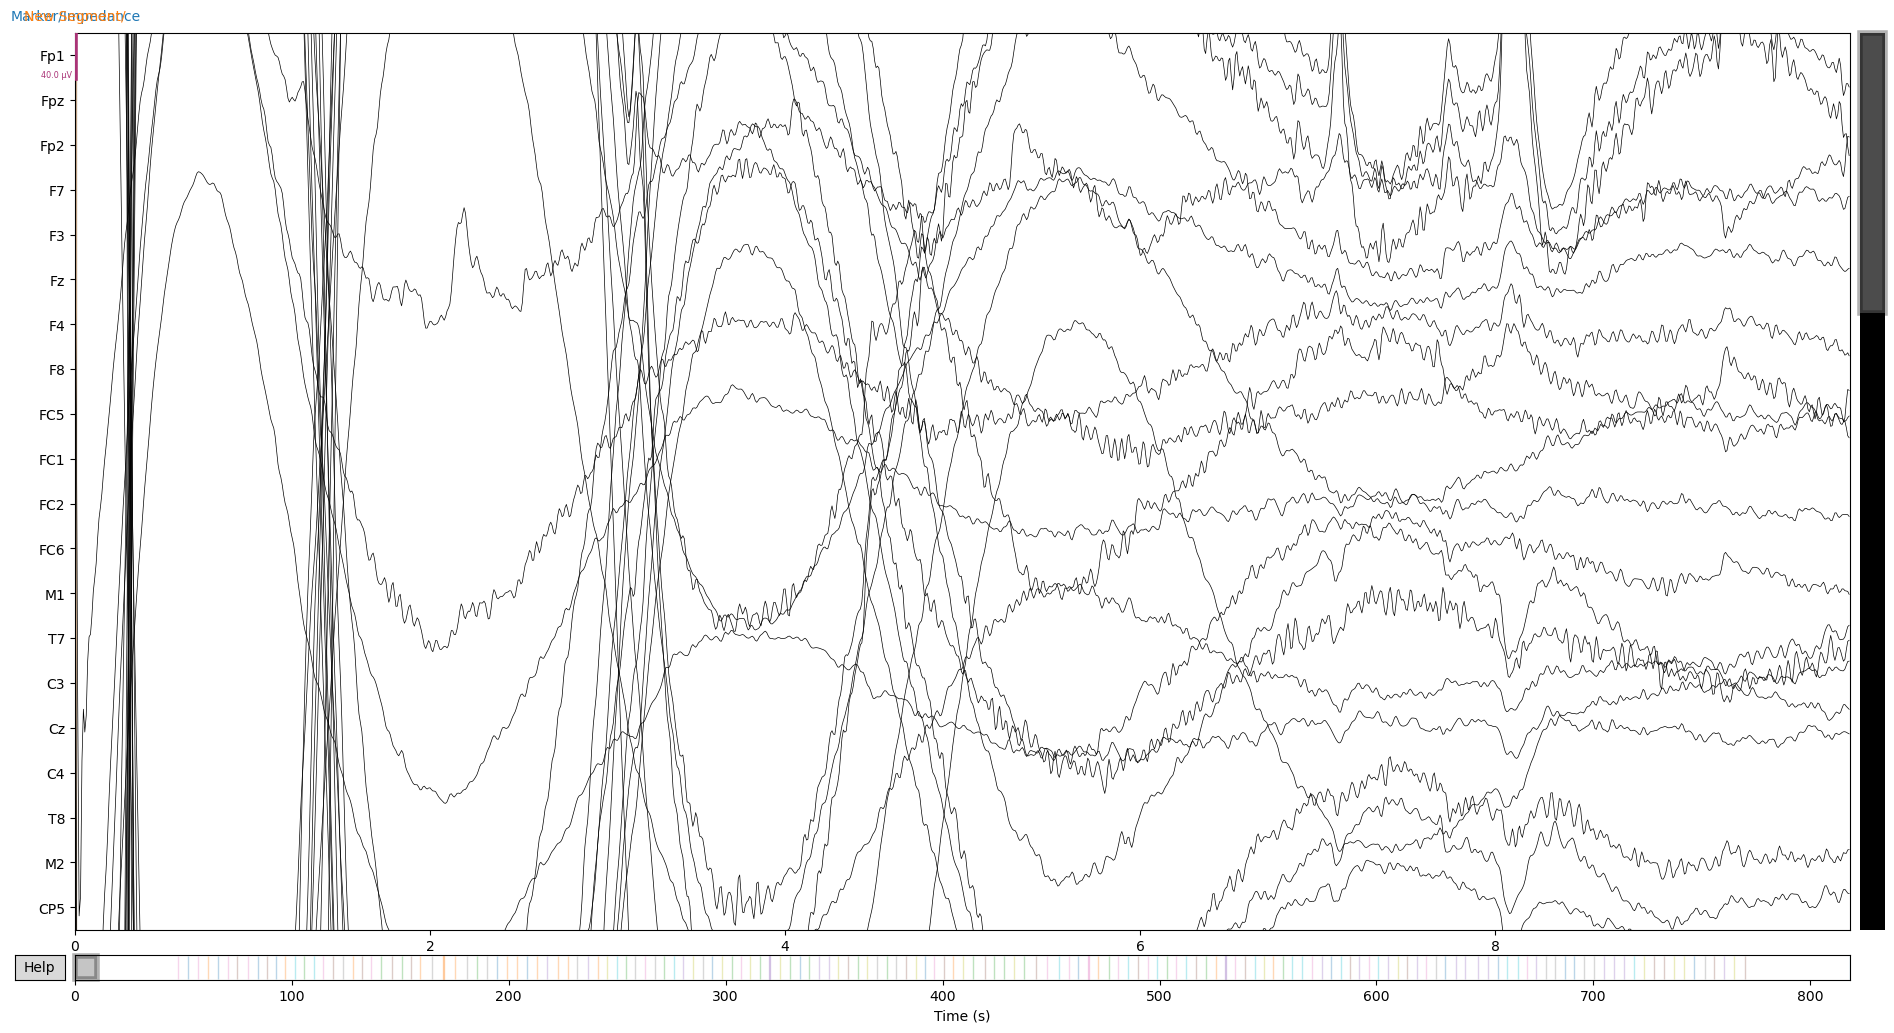

Channels marked as bad: none


In [301]:
raw.plot(clipping=None)

In [233]:
raw.interpolate_bads(reset_bads=True,mode='accurate')

<ipython-input-233-1004b0ea4b45>:1: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads(reset_bads=True,mode='accurate')


<RawBrainVision | sub-104_ses-session3_task-localizer_eeg.eeg, 64 x 204557 (818.2 s), ~100.0 MB, data loaded>

**<font face="Spectral" size=5 color='black'> (5)Re-reference to commen average </font>**

In [302]:
raw.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<RawBrainVision | sub-104_ses-session3_task-localizer_eeg.eeg, 64 x 204557 (818.2 s), ~100.0 MB, data loaded>

In [ ]:
raw.save('fif/104_test_raw.fif')

<ipython-input-243-9ce7c188a5fb>:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig2=mne.viz.plot_events(events,event_id=events_id,sfreq=raw.info['sfreq'])#plot the events


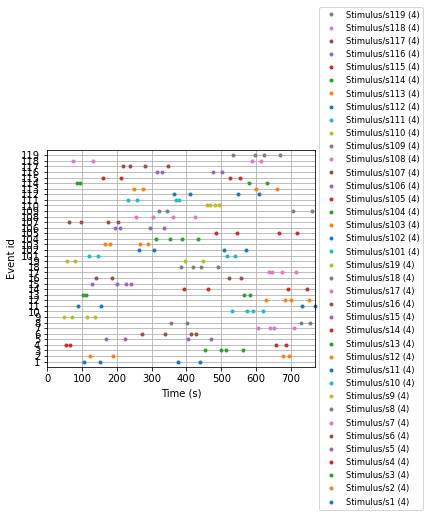

In [243]:
event_list=np.hstack([np.arange(1,20),np.arange(101,120)])
events_id=event_test.raw_marker_create(event_list)
events,events_id=mne.events_from_annotations(raw,event_id=events_id)#read events from raw annotations
fig2=mne.viz.plot_events(events,event_id=events_id,sfreq=raw.info['sfreq'])#plot the events

**<font face="Spectral" size=5 color='black'> (6)Epoch data and remove bad trials </font>**

In [ ]:
#Find events from raw data annotations before epoch data
event_list=np.hstack([np.arange(1,21),np.arange(101,121)])
events_id=event_test.raw_marker_create(event_list)
events,events_id=mne.events_from_annotations(raw,event_id=events_id)#read events from raw annotations
fig2=mne.viz.plot_events(events,event_id=events_id,sfreq=raw.info['sfreq'])#plot the events

In [244]:
epochs = mne.Epochs(raw,events=events,event_id=events_id,baseline=None,
                        preload=True,tmin=-0.3,tmax=1,reject=dict(eeg=400e-6))#epoch and reject those larger than 200 microvolt

Not setting metadata
Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
Loading data for 152 events and 326 original time points ...
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fpz']
    Rejecting  epoch based on EEG : ['Fp1']
3 bad epochs dropped


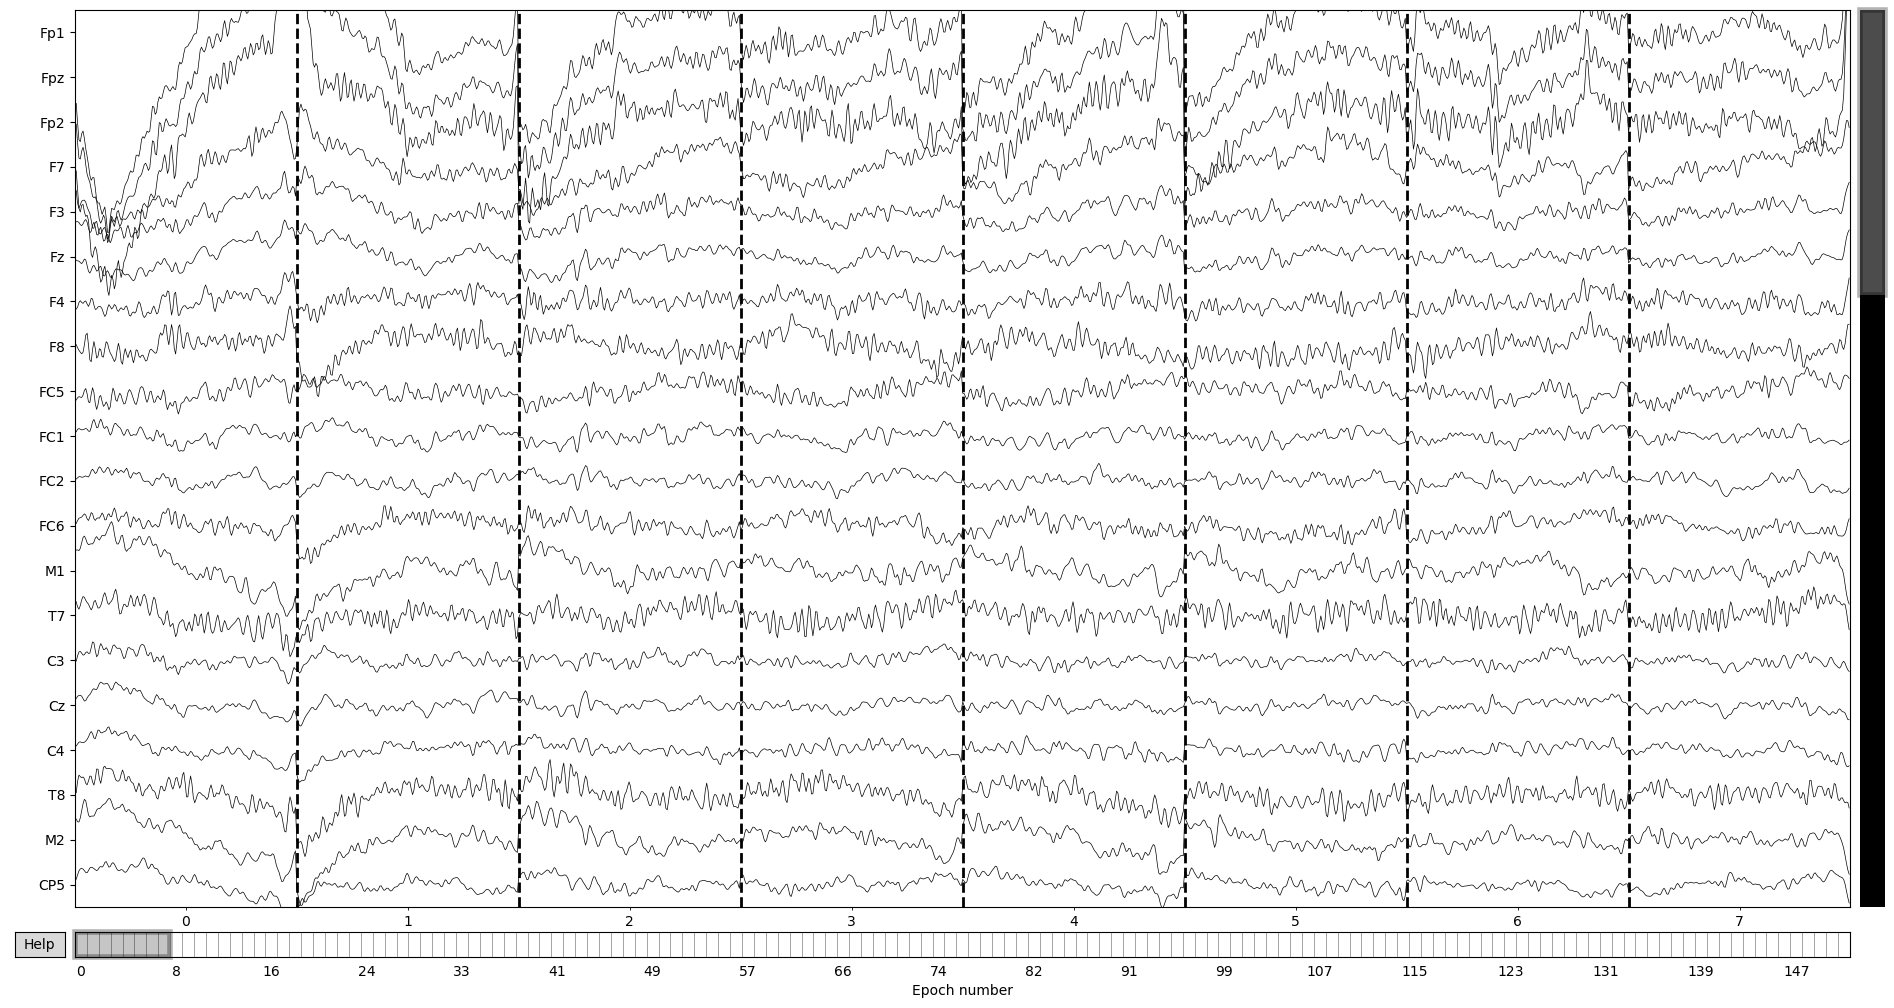

Dropped 2 epochs: 65, 143
Channels marked as bad: none


In [247]:
epochs.plot(n_epochs=8)

In [327]:
fig3=epochs.plot_drop_log()#plot the drop information

**<font face="Spectral" size=5 color='black'> (7-8)Using ICA to remove the ocular artifacts </font>**

In [359]:
ica=ICA(n_components=0.99,method='infomax',random_state=89,max_iter=1000).fit(epochs)#define the parameter of ica and fit it to epochs

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by explained variance: 36 components


<ipython-input-359-a38bb4c2645a>:1: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica=ICA(n_components=0.99,method='infomax',random_state=89,max_iter=1000).fit(epochs)#define the parameter of ica and fit it to epochs


 
Fitting ICA took 9.4s.


In [360]:
eog_indices, eog_scores=ica.find_bads_eog(epochs,threshold=0.2,measure='correlation')
ica.exclude = eog_indices
fig4=ica.plot_scores(eog_scores,exclude=ica.exclude,axhline=[-0.2,0.2],labels='eog')

Using EOG channel: EOG


In [362]:
fig5=ica.plot_sources(epochs,stop=5) 

Not setting metadata
Not setting metadata
147 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


<ipython-input-362-55f63bbc197b>:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig5=ica.plot_sources(epochs,stop=5)


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
147 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


Applying ICA to Evoked instance
    Transforming to ICA space (36 components)
    Zeroing out 4 ICA components
    Projecting back using 63 PCA components


<ipython-input-361-3ea7f49e57b7>:2: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.plot_overlay(epochs.average(),picks='eeg')


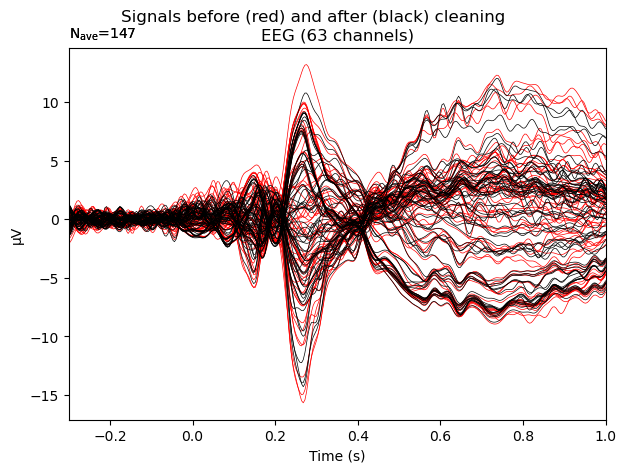

In [361]:
ica.plot_sources(epochs.average()) 
ica.plot_overlay(epochs.average(),picks='eeg')

In [ ]:
ica.apply(epochs)

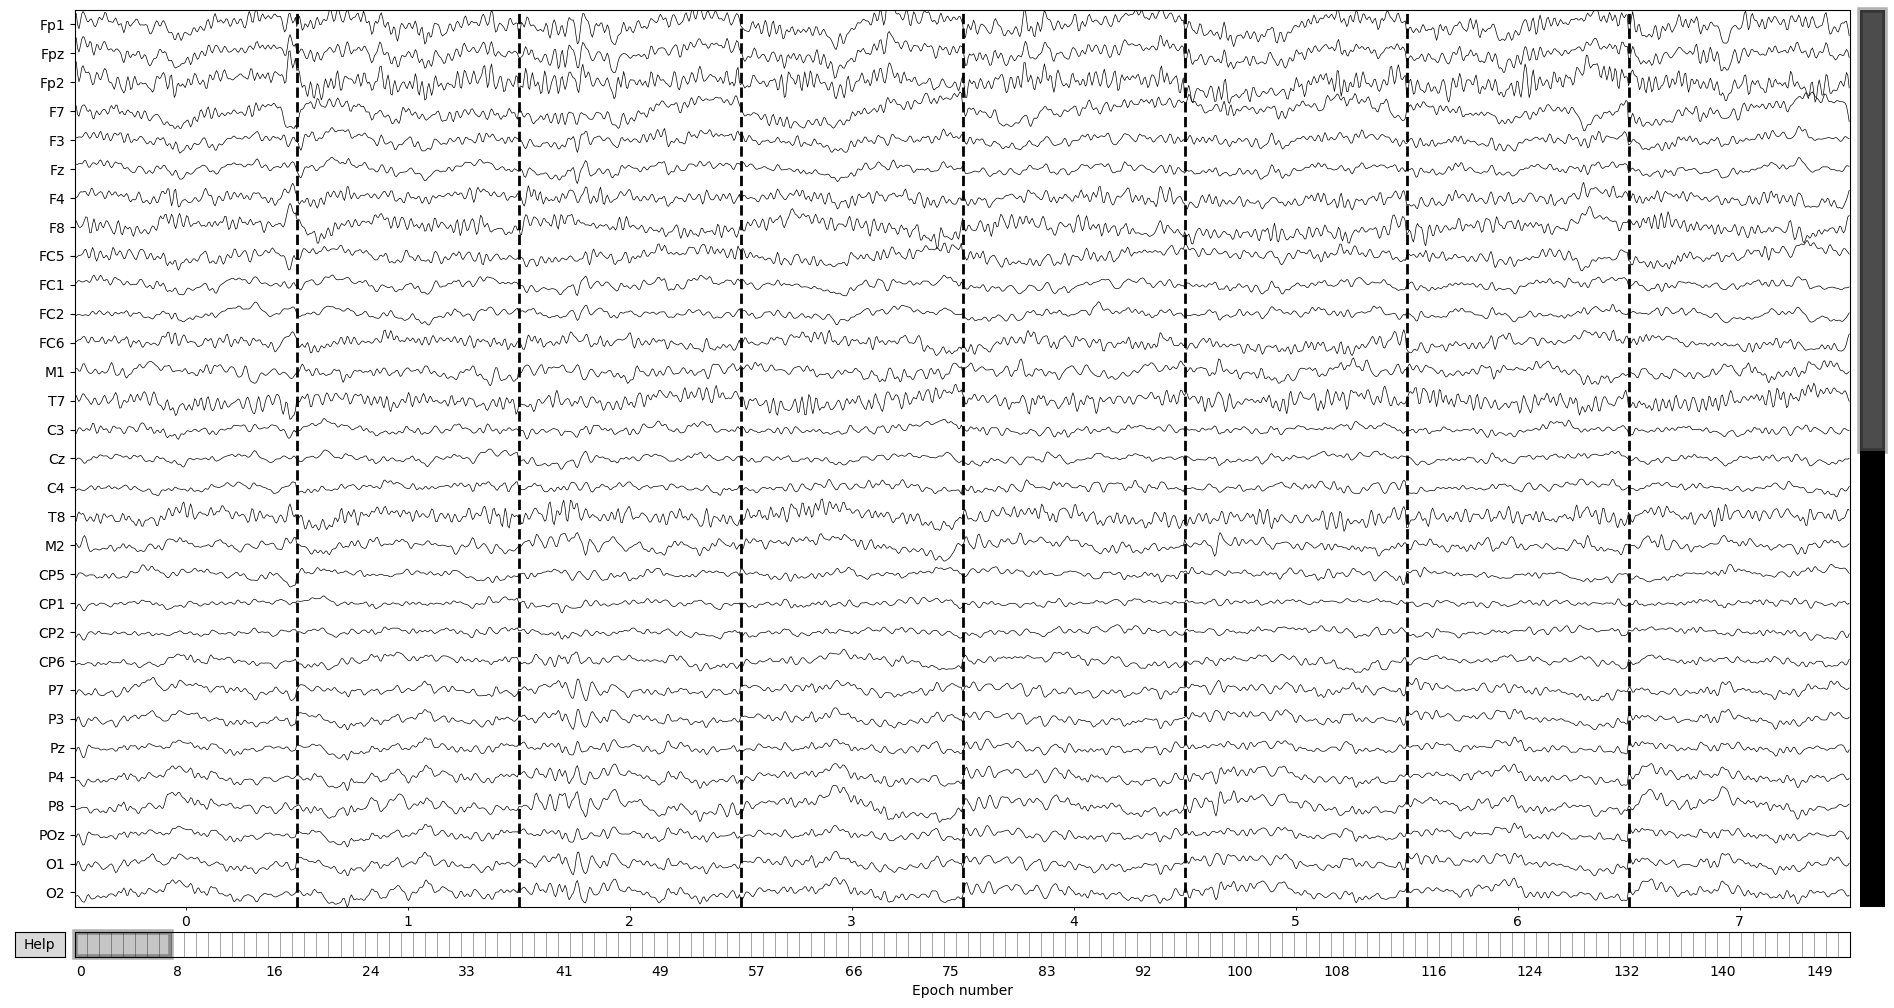

Dropped 0 epochs: 
Channels marked as bad: none


In [258]:
epochs.plot(n_epochs=8,n_channels=31)

**<font face="Spectral" size=5 color='black'> (9)Baseline Correction </font>**

In [358]:
epochs.apply_baseline(baseline=(None,0))

Applying baseline correction (mode: mean)


Number of events,147
Events,Stimulus/s1: 4Stimulus/s10: 4Stimulus/s101: 4Stimulus/s102: 4Stimulus/s103: 3Stimulus/s104: 4Stimulus/s105: 4Stimulus/s106: 4Stimulus/s107: 4Stimulus/s108: 4Stimulus/s109: 4Stimulus/s11: 3Stimulus/s110: 4Stimulus/s111: 3Stimulus/s112: 4Stimulus/s113: 4Stimulus/s114: 4Stimulus/s115: 4Stimulus/s116: 3Stimulus/s117: 4Stimulus/s118: 4Stimulus/s119: 4Stimulus/s12: 4Stimulus/s13: 4Stimulus/s14: 4Stimulus/s15: 4Stimulus/s16: 4Stimulus/s17: 4Stimulus/s18: 4Stimulus/s19: 4Stimulus/s2: 4Stimulus/s3: 3Stimulus/s4: 4Stimulus/s5: 4Stimulus/s6: 4Stimulus/s7: 4Stimulus/s8: 4Stimulus/s9: 4
Time range,-0.300 – 1.000 sec
Baseline,-0.300 – 0.000 sec


In [52]:
epochs.save('fif/sub104-epo.fif',overwrite=True)

Overwriting existing file.


**<font face="Spectral" size=5 color='tomato'>  4.Average epoched data to evoked data </font>**

In [282]:
object_id=list(event_test.raw_marker_create(np.arange(1,21)).keys())
scene_id=list(event_test.raw_marker_create(np.arange(101,121)).keys())
evoked_object=epochs[object_id].average()
evoked_scene=epochs[scene_id].average()

In [356]:
fig7=evoked_object.plot(gfp=True,show=False)

In [357]:
fig9=evoked_baby.plot_joint(title='object')

No projector specified for this dataset. Please consider the method self.add_proj.


In [296]:
condition_index={'Object':evoked_object,'Scene':evoked_scene} #set parameter for plot ERP
fig10=mne.viz.plot_compare_evokeds(condition_index,picks=['PO7','PO3','PO4','PO8'],ci=0.95,combine='mean',legend='lower right',show_sensors='upper left')#plot compared ERP  

combining channels using "mean"
combining channels using "mean"


**<font face="Spectral" size=5 color='tomato'>  5.Write a report for your data analysis to make it transparency and reproduceable </font>**

In [370]:
raw_path=('fif/')
raw1='104_test_raw.fif'
report=mne.Report(verbose=True,raw_psd=True)

Embedding : jquery.js
Embedding : jquery-ui.min.js
Embedding : bootstrap.min.js
Embedding : jquery-ui.min.css
Embedding : bootstrap.min.css


In [353]:
report.parse_folder(raw_path,pattern=raw1,render_bem=False)
report.add_figs_to_section(fig1,captions='Raw_psd',section='raw')
report.add_figs_to_section(fig2,captions='events_for_all_condition',section='events')
report.add_figs_to_section(fig3,captions='drop_epochs',section='events')
report.add_figs_to_section(fig4,captions='epochs_drop_log_auto',section='epochs')
report.add_figs_to_section(fig5,captions='ICA_sources',section='ICA')
report.add_figs_to_section(fig7,captions='evoked_animal_plot_all_channels',section='evoked')
report.add_figs_to_section(fig10,captions='ERP',section='evoked')

Opening raw data file C:\Users\Psychology\Desktop\workshop_MNE\fif\104_test_raw.fif...
    Range : 0 ... 204556 =      0.000 ...   818.224 secs
Ready.
Iterating over 1 potential files (this may take some time)
Rendering : C:\Users\Psychology\Desktop\workshop_MNE\fif\104_test_raw.fif
Opening raw data file C:\Users\Psychology\Desktop\workshop_MNE\fif\104_test_raw.fif...
    Range : 0 ... 204556 =      0.000 ...   818.224 secs
Ready.
Effective window size : 8.192 (s)


In [354]:
report.save('report_analysis.html',overwrite=True)

Saving report to location C:\Users\Psychology\Desktop\workshop_MNE\report_analysis.html
Rendering : Table of Contents
raw
 ... 104_test_raw.fif
 ... Raw_psd
events
 ... events_for_all_condition
 ... drop_epochs
epochs
 ... epochs_drop_log_auto
ICA
 ... ICA_sources
evoked
 ... evoked_animal_plot_all_channels
 ... ERP


'C:\\Users\\Psychology\\Desktop\\workshop_MNE\\report_analysis.html'